In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.shape

(17966, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [8]:
df.isnull().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

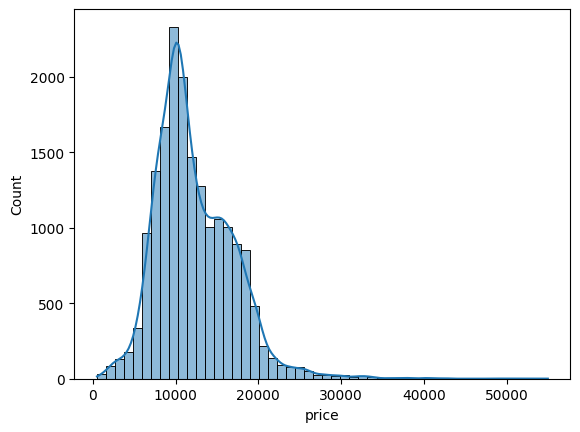

In [11]:
#EDA 
sns.histplot(df['price'],bins = 50,kde = True)

<Axes: >

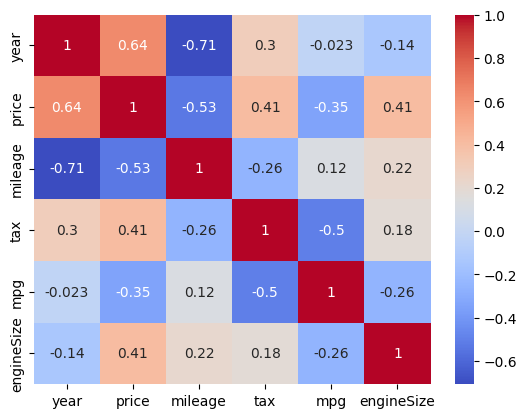

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

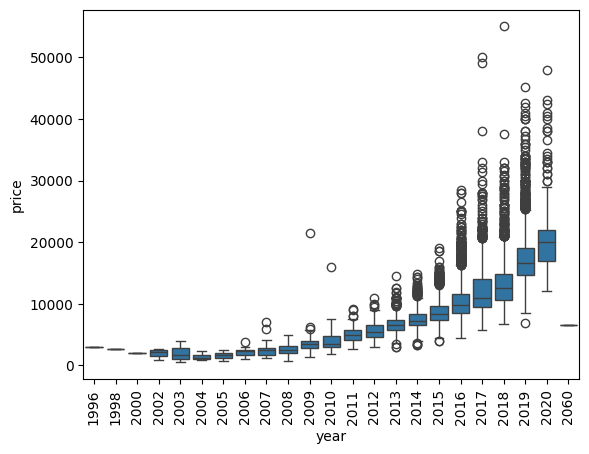

In [15]:
sns.boxplot(data = df, x = 'year', y = 'price')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='mileage', ylabel='price'>

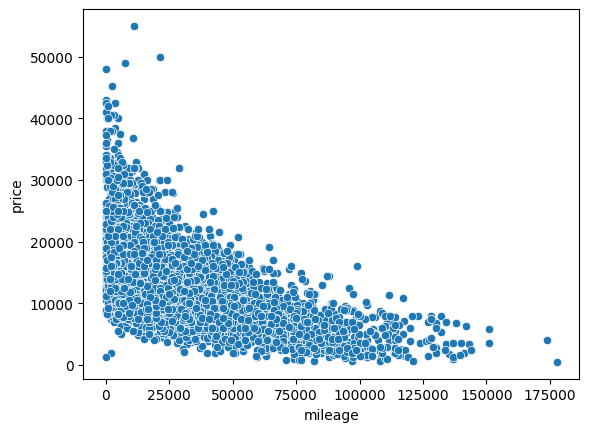

In [16]:
sns.scatterplot(data = df, x = 'mileage',y = 'price')

<Axes: xlabel='engineSize', ylabel='price'>

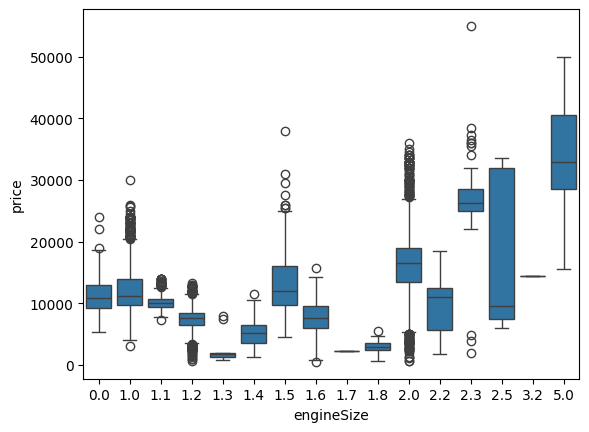

In [17]:
sns.boxplot(data = df, x = 'engineSize', y = 'price')

<Axes: xlabel='transmission', ylabel='price'>

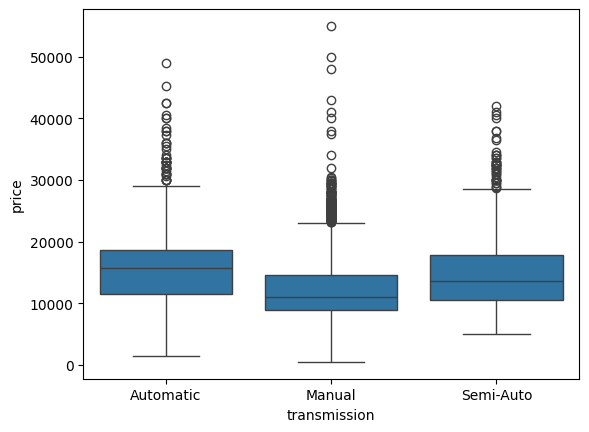

In [18]:
sns.boxplot(data = df, x = 'transmission',y = 'price')

<Axes: xlabel='fuelType', ylabel='price'>

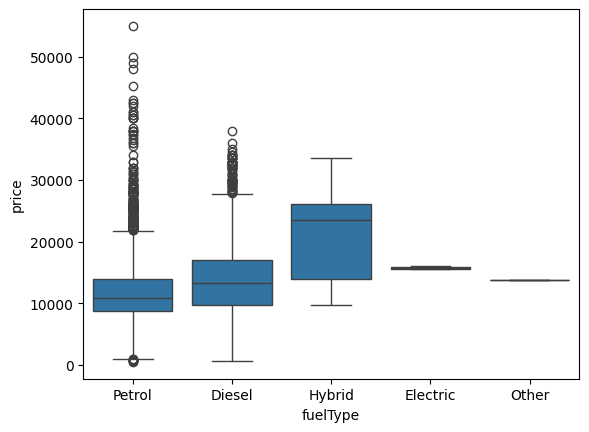

In [19]:
sns.boxplot(data = df,x = 'fuelType', y = 'price' )

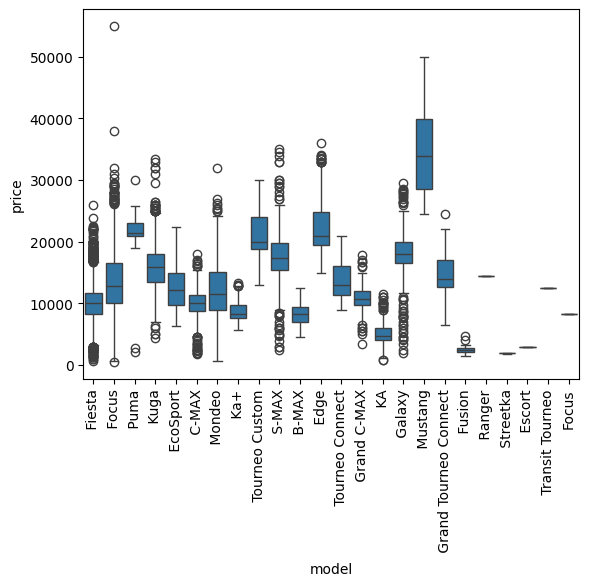

In [20]:
sns.boxplot(x = df['model'],y = df['price'])
plt.xticks(rotation = 90)
plt.show()

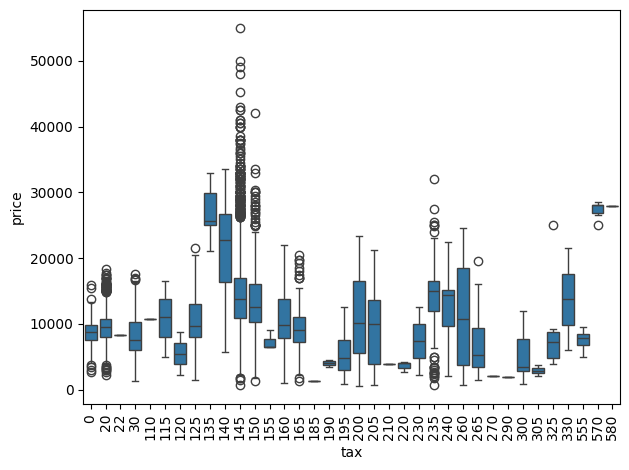

In [23]:
sns.boxplot(x = df['tax'],y = df['price'])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

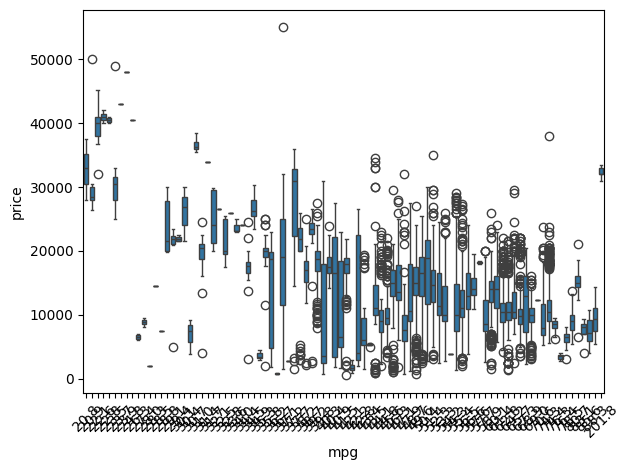

In [26]:
sns.boxplot(x = df['mpg'],y = df['price'])
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [27]:
X = df.drop(columns = ['price'],axis = 1)
y = df['price']

In [32]:
X_one_encode = pd.get_dummies(X,columns = ['model','transmission','fuelType'],drop_first = False)


In [33]:
X_one_encode = X_one_encode.astype(int)

In [34]:
X_one_encode

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,40700,30,57,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
from sklearn.preprocessing import LabelEncoder

columns = ['model', 'transmission', 'fuelType']

Xlable = X.copy()  # make a safe copy
label_encoders = {}

for col in columns:
    le = LabelEncoder()
    Xlable[col] = le.fit_transform(Xlable[col].astype(str))  # Convert to string in case of nulls
    label_encoders[col] = le

In [37]:
Xlable

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = StandardScaler()
X_one_encode[numerical_cols] = scaler.fit_transform(X_one_encode[numerical_cols])

In [40]:
X_one_encode


,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
Xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']] = scaler.fit_transform(Xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])


In [42]:
Xlable

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_one_encode, y, test_size=0.33, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([ 6888.75487917,  9328.62297666,  9420.53085767, ...,
       19099.96373064,  4948.44438264, 10424.59544226])

In [48]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [49]:
r2 = r2_score(y_test,y_pred)
r2

0.8401880779365886

In [50]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.8391843364467997


In [51]:
X_train, X_test, y_train, y_test = train_test_split(Xlable, y, test_size=0.33, random_state=42)

In [52]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
y_pred = model2.predict(X_test)

In [54]:
y_pred

array([ 6157.52473246,  9286.53653694,  9519.82817502, ...,
       19580.21385231,  7384.33202962,  9960.74790235])

In [55]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [56]:
r2 = r2_score(y_test,y_pred)
r2

0.7310215557391141

In [57]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.7306580713549777
